# Exploratory Data Analysis - Retail
Exploring the Superstore data to find out the weak and strong areas where we can work to make more profit.

In [21]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset
The dataset used is SampleSuperstore.csv<br>
Dataset Description: The dataset contains Ship Mode, Segment, Sountry, City, State, Postal Code, Region, Category, Sub-Category, Sales, Quantity, Discount, Profit.

In [59]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Analysis and Visualization

In [30]:
data.shape

(9994, 13)

The dataframe have 9994 columns and 13 rows

In [31]:
#Finding the null values in the dataset
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

There are no null values in the dataset

In [64]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Ship Mode, Segment, Country, City, State,Region, Category, Sub-Category are of object type while other are integer type

In [68]:
data['Country'].unique()

array(['United States'], dtype=object)

There is only only one country in dataset 'United States'

### Visualizing the correlation between the features in dataset

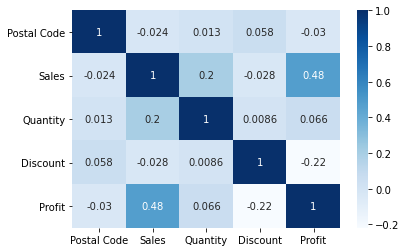

In [69]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

We can see that Profit and Sales are positively corelated, while profit and discount are negatively corelated, and profit and Quantity are almost neutal to each other.

#### Visualizing the Analysis between Sales and Profit

In [72]:
df1=data.groupby(["Sales"], as_index=False)["Profit"].sum()
df1.head()

,Sales,Profit
0,0.444,-1.1100
1,0.556,-0.9452
2,0.836,-1.3376
3,0.852,-0.5964
4,0.876,-1.4016


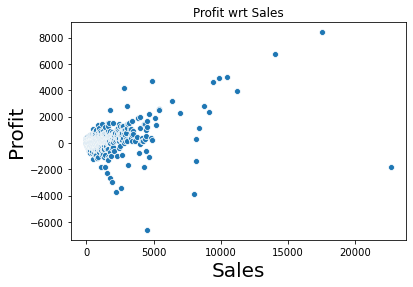

In [126]:
sns.scatterplot(df1['Sales'],df1['Profit'])
plt.xlabel("Sales",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Profit wrt Sales")
plt.show()

With increase in Sales there is increase in Profit

#### Visualizing the dataset between  Discount and Profit 

In [105]:
df2=data.groupby('Discount',as_index=False)['Profit'].sum()

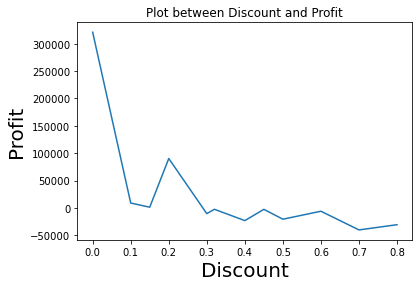

In [124]:
sns.lineplot(df2.Discount,df2.Profit)
plt.xlabel('Discount',fontsize=20)
plt.ylabel('Profit',fontsize=20)
plt.title("Plot between Discount and Profit")
plt.show()

The graph shows the negative corelation between Profit and Discount, as the profit increases discount decreases

#### Visualizing the dataset for categories and Profit

In [107]:
df3=data.groupby(['Category'],as_index=False)['Profit'].sum()

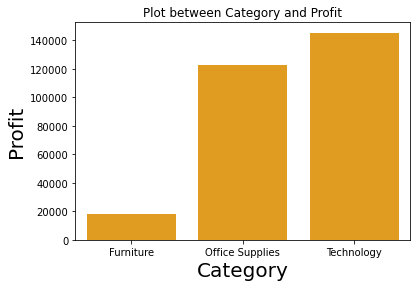

In [129]:
sns.barplot(df3['Category'],df3['Profit'],color='orange')
plt.xlabel("Category",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.title("Plot between Category and Profit")
plt.show()

The Technology Category has the highest profit so we need to increase it's sales

#### Visualizing the dataset for City and Profit

In [109]:
df4=data.groupby(['City','State'],as_index=False,sort=True)['Profit'].sum()
df4.head()

,City,State,Profit
0,Aberdeen,South Dakota,6.6300
1,Abilene,Texas,-3.7584
2,Akron,Ohio,-186.6356
3,Albuquerque,New Mexico,634.0881
4,Alexandria,Virginia,318.6183


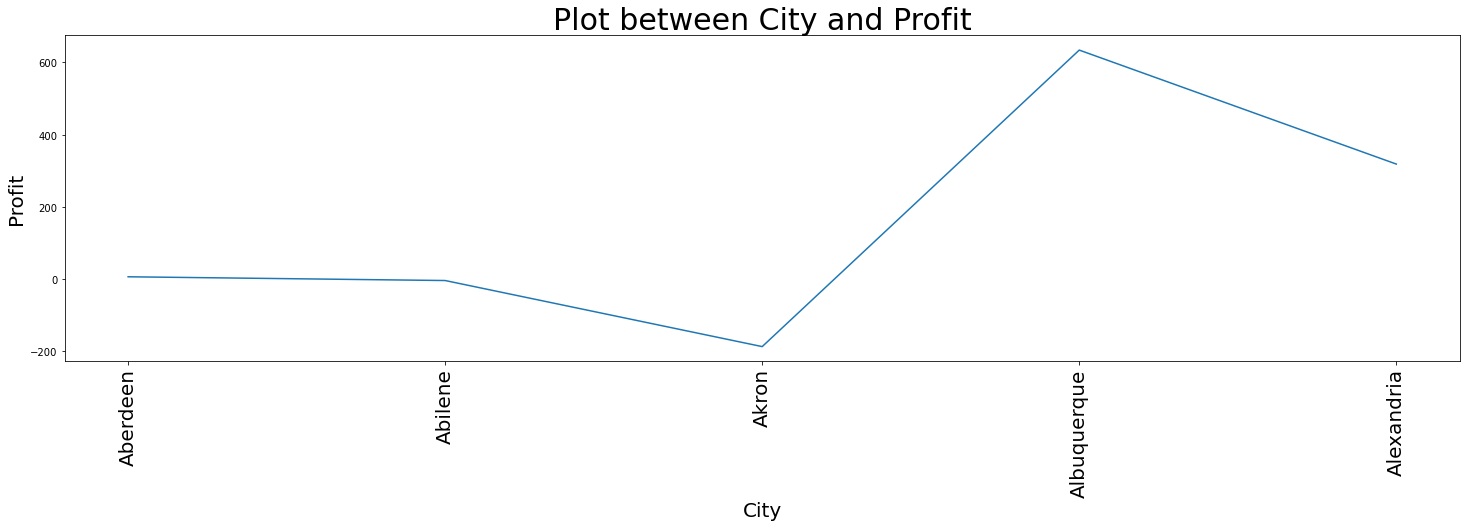

In [110]:
plt.figure(figsize=(25,6))
sns.lineplot(df4.City.head(),df4.Profit.head())
plt.xlabel("City",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.xticks(rotation=90,fontsize=20)
plt.title("Plot between City and Profit",fontsize=30)
plt.show()

In the top 5 Cities in the dataset Akron have the lowest profit

In [111]:
df4.groupby(['City','State'],as_index=False,sort=True)['Profit'].sum().agg([np.min])

,City,State,Profit
amin,Aberdeen,Alabama,-13837.7674


Aberdeen City in Alabama State have the lowest profit.

In [112]:
df4.groupby(['City','State'],as_index=False,sort=True)['Profit'].sum().agg([np.max])

,City,State,Profit
amax,Yuma,Wyoming,62036.9837


Yuma City of Wyoming State have the highest profit

#### Visualizing the Region and Profit 

In [131]:
df5=data.groupby(['Region'],as_index=False)['Profit'].sum()
df5

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


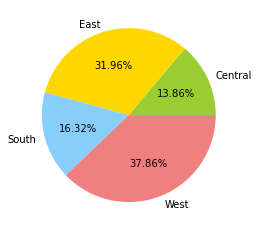

In [142]:
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
plt.pie(df5.Profit,labels=df5.Region,autopct='%1.2f%%',colors=colors)
plt.show()

West region has the most profit!

#### Visualizing the dataset between Quantity and Segmentation

In [143]:
df6=data.groupby(['Segment'],as_index=False)['Quantity'].sum()

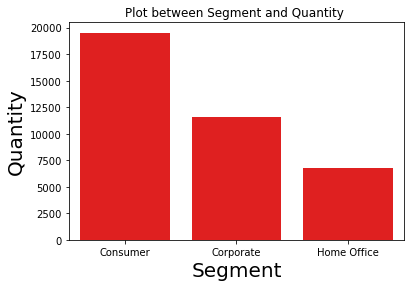

In [144]:
sns.barplot(df6.Segment,df6.Quantity,color='Red')
plt.xlabel("Segment",fontsize=20)
plt.ylabel("Quantity",fontsize=20)
plt.title("Plot between Segment and Quantity ")
plt.show()

Consumers purchases more good quantity so they should be targeted more to earn more profit

In [150]:
df7=data.groupby(['Sub-Category'],as_index=False)['Profit'].sum()

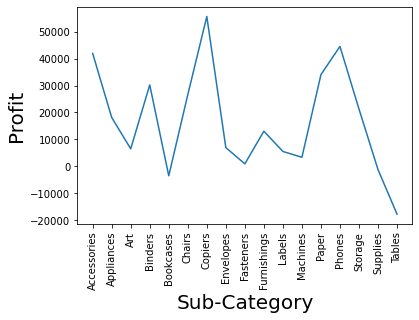

In [153]:
plt.plot(df7['Sub-Category'],df7['Profit'])
plt.xticks(rotation=90)
plt.xlabel('Sub-Category',fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.show()

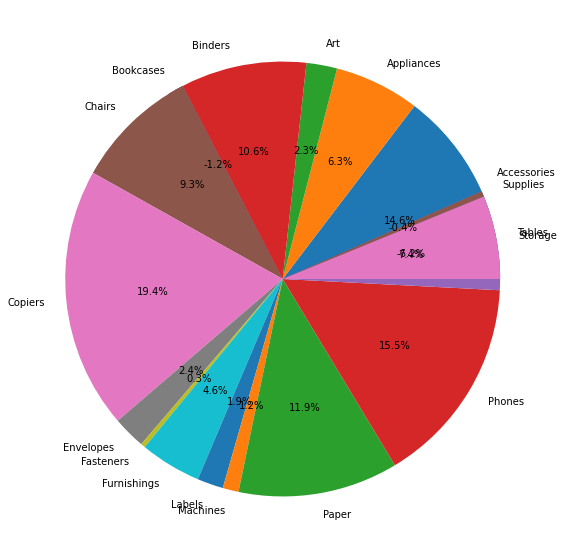

In [168]:
#pie chart
plt.figure(figsize=(10,10))
plt.pie(df7.Profit,labels=df7['Sub-Category'],autopct='%1.1f%%')
plt.show()

Chair, Copier, Phones, Binders, Papers are the sub categories with high profit.